In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


### Download and prepare the CIFAR10 dataset

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


### Building the model(s)

In [0]:
params = [1,2,3,4,5,6,8,9,10,11,12,13,14,16]
all_models=[]
for k in params:
  model = models.Sequential()
  model.add(layers.Conv2D((2**1)*k, (3, 3), padding="SAME", activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D((2**2)*k, (3, 3), padding="SAME", activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D((2**2)*k, (3, 3), padding="SAME", activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D((2**3)*k, (3, 3), padding="SAME", activation='relu'))
  model.add(layers.Conv2D((2**3)*k, (3, 3), padding="SAME", activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense((2**3)*k, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  all_models.append(model)

In [0]:
def count_params_in_model(model):
  """
    Function couting the total number of TRAINABLE weights for a given model.
  """
  sum = 0
  for layer in model.layers:
    sum += layer.count_params()
  return sum

count_params_in_model(all_models[3])
  

76762

### Compiling, Training, Evaluating

##########################################
model: 1


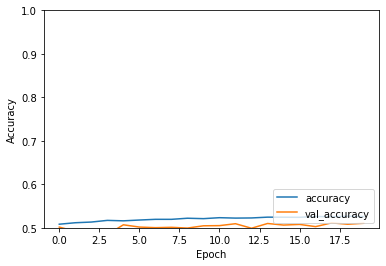

50000/50000 - 4s - loss: 1.3040 - accuracy: 0.5266
10000/10000 - 1s - loss: 1.3645 - accuracy: 0.5104
##########################################
##########################################
model: 2


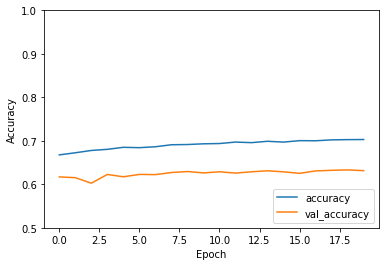

50000/50000 - 4s - loss: 0.8178 - accuracy: 0.7103
10000/10000 - 1s - loss: 1.0921 - accuracy: 0.6314
##########################################
##########################################
model: 3


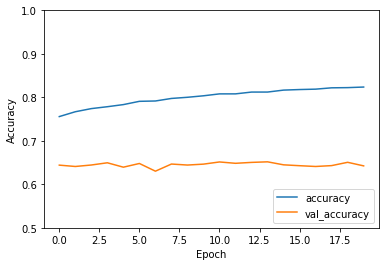

50000/50000 - 4s - loss: 0.5161 - accuracy: 0.8182
10000/10000 - 1s - loss: 1.3311 - accuracy: 0.6424
##########################################
##########################################
model: 4


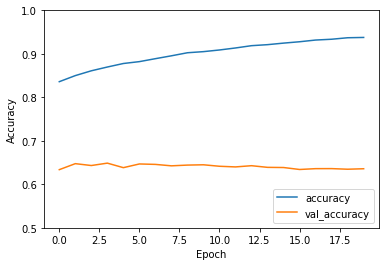

50000/50000 - 4s - loss: 0.1710 - accuracy: 0.9440
10000/10000 - 1s - loss: 2.4335 - accuracy: 0.6358
##########################################
##########################################
model: 5


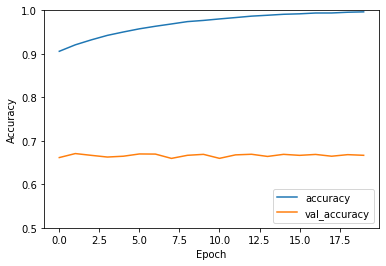

50000/50000 - 4s - loss: 0.0113 - accuracy: 0.9969
10000/10000 - 1s - loss: 4.6753 - accuracy: 0.6667
##########################################
##########################################
model: 6


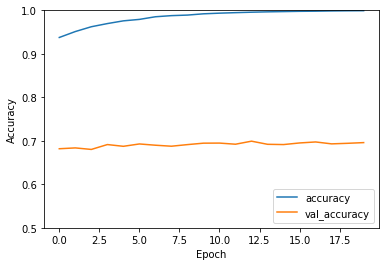

50000/50000 - 4s - loss: 0.0011 - accuracy: 0.9998
10000/10000 - 1s - loss: 5.4279 - accuracy: 0.6959
##########################################
##########################################
model: 7


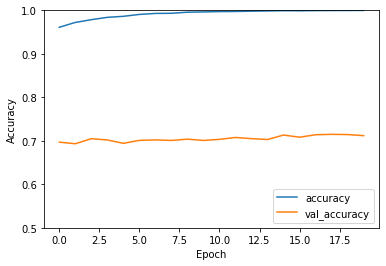

50000/50000 - 4s - loss: 2.1753e-04 - accuracy: 0.9999
10000/10000 - 1s - loss: 6.4436 - accuracy: 0.7119
##########################################
##########################################
model: 8


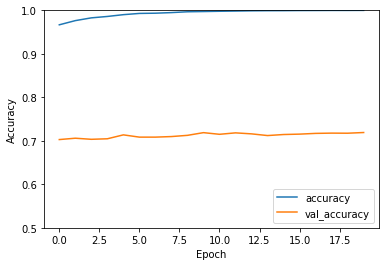

50000/50000 - 4s - loss: 5.1048e-05 - accuracy: 1.0000
10000/10000 - 1s - loss: 7.3538 - accuracy: 0.7191
##########################################
##########################################
model: 9


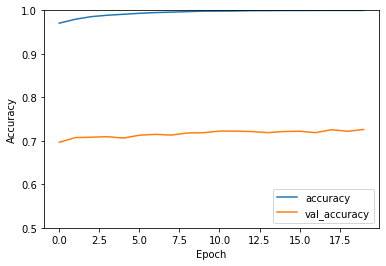

50000/50000 - 4s - loss: 6.9266e-04 - accuracy: 0.9998
10000/10000 - 1s - loss: 7.6214 - accuracy: 0.7261
##########################################
##########################################
model: 10


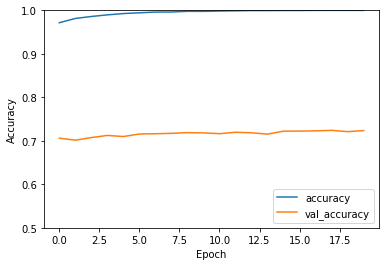

50000/50000 - 4s - loss: 3.0188e-05 - accuracy: 1.0000
10000/10000 - 1s - loss: 8.0252 - accuracy: 0.7236
##########################################
##########################################
model: 11


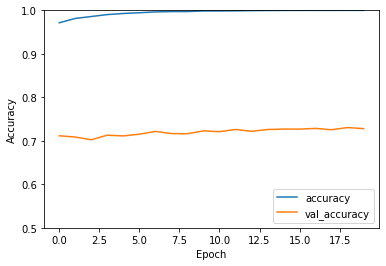

50000/50000 - 4s - loss: 1.4679e-05 - accuracy: 1.0000
10000/10000 - 1s - loss: 8.3470 - accuracy: 0.7280
##########################################
##########################################
model: 12


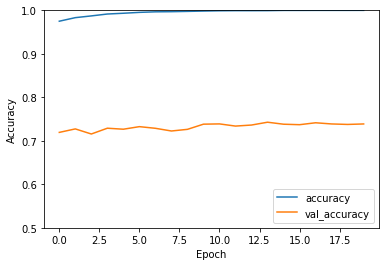

50000/50000 - 4s - loss: 4.4162e-07 - accuracy: 1.0000
10000/10000 - 1s - loss: 8.4847 - accuracy: 0.7388
##########################################
##########################################
model: 13


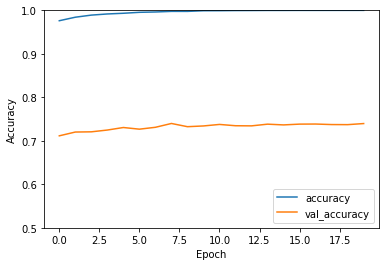

50000/50000 - 5s - loss: 1.4482e-07 - accuracy: 1.0000
10000/10000 - 1s - loss: 9.1770 - accuracy: 0.7397
##########################################
##########################################
model: 14


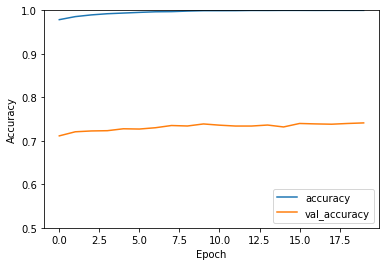

50000/50000 - 5s - loss: 1.5174e-05 - accuracy: 1.0000
10000/10000 - 1s - loss: 9.0511 - accuracy: 0.7412
##########################################


In [0]:
over_train_acc=[]
over_test_acc=[]
i=1
for model in all_models:

  print("##########################################")
  print("model:",i)
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=15, 
                      validation_data=(test_images, test_labels),
                      verbose=0)
  RMS_optim = tf.optimizers.RMSprop(decay=1e-4)
  model.compile(optimizer=RMS_optim,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(train_images, train_labels, epochs=20, 
                      validation_data=(test_images, test_labels),
                      verbose=0)
  #Displaying the last 20 epochs of training
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.5, 1])
  plt.legend(loc='lower right')
  plt.show()

  train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  over_train_acc.append(train_acc)
  over_test_acc.append(test_acc)

  i+=1
  print("##########################################")
  #print(test_acc)

### Generalization performance dependance on weight numbers

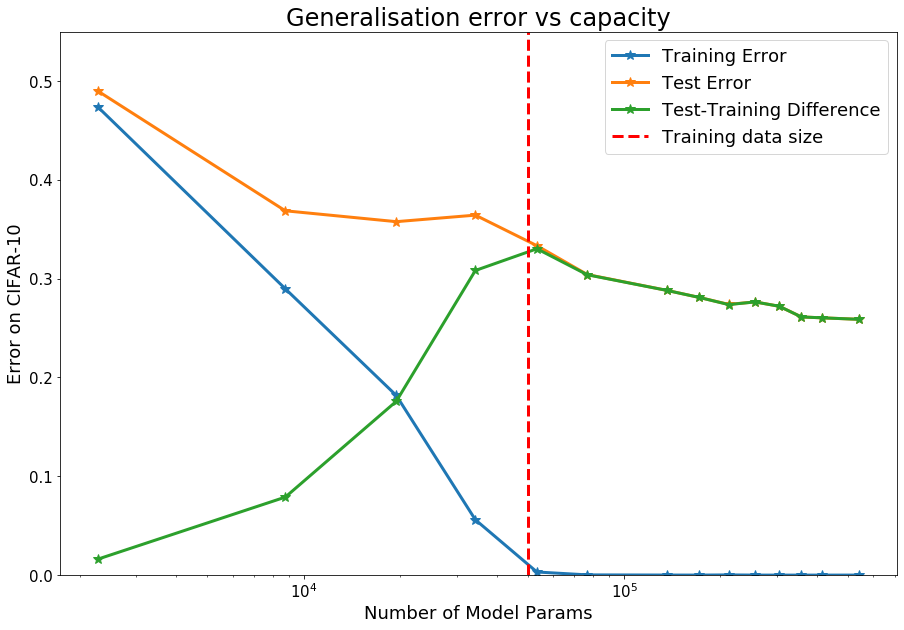

In [0]:
import numpy as np

Numb_of_params = [count_params_in_model(model) for model in all_models]
#print(Numb_of_params)
#print(over_train_acc)
print()
print()
over_train_acc = np.array(over_train_acc)
over_test_acc = np.array(over_test_acc)

plt.figure(figsize=(15,10))
plt.plot(Numb_of_params, 1-over_train_acc, label='Training Error', marker="*", linewidth=3, markersize=10)
plt.plot(Numb_of_params, 1-over_test_acc, label = 'Test Error', marker="*", linewidth=3, markersize=10)
plt.plot(Numb_of_params, over_train_acc-over_test_acc, label = "Test-Training Difference", marker="*", linewidth=3, markersize=10)
plt.axvline(x=len(train_images), ls="--", c="red", label="Training data size", linewidth=3)
plt.tick_params(labelsize=15)
plt.title("Generalisation error vs capacity", fontsize=24)
plt.xlabel('Number of Model Params', fontsize=18)
plt.xscale("log")
plt.ylabel('Error on CIFAR-10', fontsize=18)
plt.ylim([0, 0.55])
plt.legend(loc='upper right',prop={'size': 18})
plt.show()
